In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statistics
%matplotlib inline

hr = pd.read_csv('/Users/raychilds/Desktop/ThinkfulFiles/hr.csv')
spt = pd.read_csv('/Users/raychilds/Downloads/Spotify2k17.csv')

# Heart Rates in Pop Music: An Analysis.

Is there a correlation between heart rate and musical beats per minute? What can the top 100 songs in 2017 tell us about our biological rhythm? Is there a preferred tempo? Do pop producers deliberately choose a certain BPM for a song in order to increase it's chances of hitting/staying on the charts longer? Heart rates are measured by Beats Per Minute, and so is music. We'll compare resting heart rates with BPM's first in the entire top 100 chart of 2017, and then in the Top 10 biggest hits. 

I've chosen a simple dataset of 130 patients resting heart rates from the American Heart Association ordered simply by anonymous patient number, and their results from a heart monitor, while no activity was being performed. It's important to note, these rates may be slightly higher than rest, if for some reason the patient was nervous while in the doctor's office, something they may percieve as "unnatural." 

The second dataset is Spotify's Top 100 Songs from 2017, categorizing the music by acousticness, energy, beats per minute, etc. Spotify is currently the leading music streaming servince in the world, and providing a public API by artist, song, and charts.

# 1) What is the Average Resting Heart Rate in BPM? 

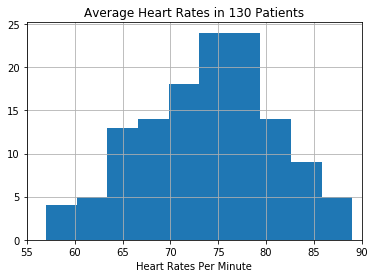

In [351]:
hr.hist('HeartRate')
plt.xlabel('Heart Rates Per Minute')
plt.title('Average Heart Rates in 130 Patients')
plt.xlim(55,90)
plt.show()

In [352]:
(values, counts) = np.unique(hr['HeartRate'], return_counts=True)
ind = np.argmax(counts)
values[ind]

73

In [353]:
hr.describe()

,Patients,HeartRate
count,130.000000,130.000000
mean,65.500000,73.761538
std,37.671829,7.062077
min,1.000000,57.000000
25%,33.250000,69.000000
50%,65.500000,74.000000
75%,97.750000,79.000000
max,130.000000,89.000000


The average heartrate of a person at rest is 73 heart beats per minute. Resting heartrates are typically measured using bell curves, as they are a naturally occurring biological phenomenon with few outliers.

# 2)  Is There a Preferred Tempo* in Top 100 Music?  How Does it Relate to a Resting Heart Rate? 

*Tempo (noun) : Speed at which music is played, measured in BPM

Let's search the entire top 100 list for songs with the same amount of beats per minute as the average resting person: 

In [354]:
spt.loc[lambda df: spt['tempo'] > 73, :]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.8130,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.4460,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.8110,80.924,288600.0,4.0
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
6,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.5150,99.968,220781.0,4.0
7,3B54sVLJ402zGa6Xm4YGN,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.7330,97.985,233902.0,4.0
8,0KKkJNfGyhkQ5aFogxQAP,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0
9,3NdDpSvN911VPGivFlV5d,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,0.735,0.451,0.0,-8.374,1.0,0.0585,0.063100,0.000013,0.3250,0.0862,117.973,245200.0,4.0


In [355]:
df0 = spt.loc[lambda df: spt['tempo'] > 73, :]
len(df0)

100

### 100% of the songs on the Top 100 List has a tempo above the average resting heart rate; now that we've established an orientation, let's try going higher: 

In [356]:
spt.loc[lambda df: spt['tempo'] > 130, :]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
8,0KKkJNfGyhkQ5aFogxQAP,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0
10,7GX5flRQZVHRAGd6B4TmD,XO TOUR Llif3,Lil Uzi Vert,0.732,0.750,11.0,-6.366,0.0,0.2310,0.002640,0.000000,0.1090,0.4010,155.096,182707.0,4.0
14,0VgkVdmE4gld66l8iyGjg,Mask Off,Future,0.833,0.434,2.0,-8.795,1.0,0.4310,0.010200,0.021900,0.1650,0.2810,150.062,204600.0,4.0
17,6PCUP3dWmTjcTtXY02oFd,Castle on the Hill,Ed Sheeran,0.461,0.834,2.0,-4.868,1.0,0.0989,0.023200,0.000011,0.1400,0.4710,135.007,261154.0,4.0
21,0tKcYR2II1VCQWT79i5Nr,Thunder,Imagine Dragons,0.600,0.810,0.0,-4.749,1.0,0.0479,0.006830,0.210000,0.1550,0.2980,167.880,187147.0,4.0
27,3ebXMykcMXOcLeJ9xZ17X,Scared to Be Lonely,Martin Garrix,0.584,0.540,1.0,-7.786,0.0,0.0576,0.089500,0.000000,0.2610,0.1950,137.972,220883.0,4.0
31,5aAx2yezTd8zXrkmtKl66,Starboy,The Weeknd,0.681,0.594,7.0,-7.028,1.0,0.2820,0.165000,0.000003,0.1340,0.5350,186.054,230453.0,4.0
37,7wGoVu4Dady5GV0Sv4UIs,rockstar,Post Malone,0.577,0.522,5.0,-6.594,0.0,0.0984,0.130000,0.000090,0.1420,0.1190,159.772,218320.0,4.0


In [357]:
df1 = spt.loc[lambda df: spt['tempo'] > 130, :]

In [358]:
len(df1)

31

### 31% of the songs in the top 100 have a BPM of 130 or higher.

In [359]:
spt.loc[lambda df: spt['tempo'] > 140, :]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
10,7GX5flRQZVHRAGd6B4TmD,XO TOUR Llif3,Lil Uzi Vert,0.732,0.750,11.0,-6.366,0.0,0.2310,0.002640,0.000000,0.1090,0.4010,155.096,182707.0,4.0
14,0VgkVdmE4gld66l8iyGjg,Mask Off,Future,0.833,0.434,2.0,-8.795,1.0,0.4310,0.010200,0.021900,0.1650,0.2810,150.062,204600.0,4.0
21,0tKcYR2II1VCQWT79i5Nr,Thunder,Imagine Dragons,0.600,0.810,0.0,-4.749,1.0,0.0479,0.006830,0.210000,0.1550,0.2980,167.880,187147.0,4.0
31,5aAx2yezTd8zXrkmtKl66,Starboy,The Weeknd,0.681,0.594,7.0,-7.028,1.0,0.2820,0.165000,0.000003,0.1340,0.5350,186.054,230453.0,4.0
37,7wGoVu4Dady5GV0Sv4UIs,rockstar,Post Malone,0.577,0.522,5.0,-6.594,0.0,0.0984,0.130000,0.000090,0.1420,0.1190,159.772,218320.0,4.0
39,3A7qX2QjDlPnazUsRk5y0,2U (feat. Justin Bieber),David Guetta,0.548,0.650,8.0,-5.827,0.0,0.0591,0.219000,0.000000,0.2250,0.5570,144.937,194897.0,4.0
52,4pdPtRcBmOSQDlJ3Fk945,Let Me Love You,DJ Snake,0.476,0.718,8.0,-5.309,1.0,0.0576,0.078400,0.000010,0.1220,0.1420,199.864,205947.0,4.0
57,3m660poUr1chesgkkjQM7,Sorry Not Sorry,Demi Lovato,0.704,0.633,11.0,-6.923,0.0,0.2410,0.021400,0.000000,0.2900,0.8630,144.021,203760.0,4.0


In [360]:
df2 = spt.loc[lambda df: spt['tempo'] > 140, :]

In [361]:
len(df2)

20

### 20% of the songs in the top 100 have a BPM of 140 or higher.

In [362]:
spt.loc[lambda df: spt['tempo'] > 150, :]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
10,7GX5flRQZVHRAGd6B4TmD,XO TOUR Llif3,Lil Uzi Vert,0.732,0.750,11.0,-6.366,0.0,0.2310,0.002640,0.000000,0.1090,0.4010,155.096,182707.0,4.0
14,0VgkVdmE4gld66l8iyGjg,Mask Off,Future,0.833,0.434,2.0,-8.795,1.0,0.4310,0.010200,0.021900,0.1650,0.2810,150.062,204600.0,4.0
21,0tKcYR2II1VCQWT79i5Nr,Thunder,Imagine Dragons,0.600,0.810,0.0,-4.749,1.0,0.0479,0.006830,0.210000,0.1550,0.2980,167.880,187147.0,4.0
31,5aAx2yezTd8zXrkmtKl66,Starboy,The Weeknd,0.681,0.594,7.0,-7.028,1.0,0.2820,0.165000,0.000003,0.1340,0.5350,186.054,230453.0,4.0
37,7wGoVu4Dady5GV0Sv4UIs,rockstar,Post Malone,0.577,0.522,5.0,-6.594,0.0,0.0984,0.130000,0.000090,0.1420,0.1190,159.772,218320.0,4.0
52,4pdPtRcBmOSQDlJ3Fk945,Let Me Love You,DJ Snake,0.476,0.718,8.0,-5.309,1.0,0.0576,0.078400,0.000010,0.1220,0.1420,199.864,205947.0,4.0
58,3kxfsdsCpFgN412fpnW85,Redbone,Childish Gambino,0.743,0.359,1.0,-10.401,1.0,0.0794,0.199000,0.006110,0.1370,0.5870,160.083,326933.0,4.0
61,3umS4y3uQDkqekNjVpiRU,El Amante,Nicky Jam,0.683,0.691,8.0,-5.535,1.0,0.0432,0.243000,0.000000,0.1400,0.7320,179.910,219507.0,4.0


In [363]:
df4 = spt.loc[lambda df: spt['tempo'] > 150, :]

In [364]:
len(df3)

7

### 7% of the songs in the top 100 have a BPM of 150 or higher.

In [365]:
spt.loc[lambda df: spt['tempo'] > 160, :]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.20900,0.000000,0.112,0.8460,177.833,228200.0,4.0
21,0tKcYR2II1VCQWT79i5Nr,Thunder,Imagine Dragons,0.600,0.810,0.0,-4.749,1.0,0.0479,0.00683,0.210000,0.155,0.2980,167.880,187147.0,4.0
31,5aAx2yezTd8zXrkmtKl66,Starboy,The Weeknd,0.681,0.594,7.0,-7.028,1.0,0.2820,0.16500,0.000003,0.134,0.5350,186.054,230453.0,4.0
52,4pdPtRcBmOSQDlJ3Fk945,Let Me Love You,DJ Snake,0.476,0.718,8.0,-5.309,1.0,0.0576,0.07840,0.000010,0.122,0.1420,199.864,205947.0,4.0
58,3kxfsdsCpFgN412fpnW85,Redbone,Childish Gambino,0.743,0.359,1.0,-10.401,1.0,0.0794,0.19900,0.006110,0.137,0.5870,160.083,326933.0,4.0
61,3umS4y3uQDkqekNjVpiRU,El Amante,Nicky Jam,0.683,0.691,8.0,-5.535,1.0,0.0432,0.24300,0.000000,0.140,0.7320,179.910,219507.0,4.0
63,6520aj0B4FSKGVuKNsOCO,Chained To The Rhythm,Katy Perry,0.448,0.801,0.0,-5.363,1.0,0.1650,0.07330,0.000000,0.146,0.4620,189.798,237734.0,4.0
66,5hYTyyh2odQKphUbMqc5g,"How Far I'll Go - From ""Moana""",Alessia Cara,0.314,0.555,9.0,-9.601,1.0,0.3700,0.15700,0.000108,0.067,0.1590,179.666,175517.0,4.0
99,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.10100,0.000001,0.106,0.0967,180.043,239000.0,4.0


In [366]:
df4 = spt.loc[lambda df: spt['tempo'] > 160, :]
len(df4)

9

### 9% of the songs in the top 100 have a BPM of 160 or higher.

In [367]:
spt.loc[lambda df: spt['tempo'] > 170, :]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.112,0.8460,177.833,228200.0,4.0
31,5aAx2yezTd8zXrkmtKl66,Starboy,The Weeknd,0.681,0.594,7.0,-7.028,1.0,0.2820,0.1650,0.000003,0.134,0.5350,186.054,230453.0,4.0
52,4pdPtRcBmOSQDlJ3Fk945,Let Me Love You,DJ Snake,0.476,0.718,8.0,-5.309,1.0,0.0576,0.0784,0.000010,0.122,0.1420,199.864,205947.0,4.0
61,3umS4y3uQDkqekNjVpiRU,El Amante,Nicky Jam,0.683,0.691,8.0,-5.535,1.0,0.0432,0.2430,0.000000,0.140,0.7320,179.910,219507.0,4.0
63,6520aj0B4FSKGVuKNsOCO,Chained To The Rhythm,Katy Perry,0.448,0.801,0.0,-5.363,1.0,0.1650,0.0733,0.000000,0.146,0.4620,189.798,237734.0,4.0
66,5hYTyyh2odQKphUbMqc5g,"How Far I'll Go - From ""Moana""",Alessia Cara,0.314,0.555,9.0,-9.601,1.0,0.3700,0.1570,0.000108,0.067,0.1590,179.666,175517.0,4.0
99,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.1010,0.000001,0.106,0.0967,180.043,239000.0,4.0


In [368]:
df5 = spt.loc[lambda df: spt['tempo'] > 170, :]

In [369]:
len(df5)

7

### 7% of the songs in the top 100 have a BPM of 170 or higher.

In [370]:
spt.loc[lambda df: spt['tempo'] > 180, :]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
31,5aAx2yezTd8zXrkmtKl66,Starboy,The Weeknd,0.681,0.594,7.0,-7.028,1.0,0.2820,0.1650,0.000003,0.134,0.5350,186.054,230453.0,4.0
52,4pdPtRcBmOSQDlJ3Fk945,Let Me Love You,DJ Snake,0.476,0.718,8.0,-5.309,1.0,0.0576,0.0784,0.000010,0.122,0.1420,199.864,205947.0,4.0
63,6520aj0B4FSKGVuKNsOCO,Chained To The Rhythm,Katy Perry,0.448,0.801,0.0,-5.363,1.0,0.1650,0.0733,0.000000,0.146,0.4620,189.798,237734.0,4.0
99,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.1010,0.000001,0.106,0.0967,180.043,239000.0,4.0


In [371]:
df6 = spt.loc[lambda df: spt['tempo'] > 180, :]
len(df6)

4

### 4% of the songs in the top 100 have a BPM of 180 or higher.

In [372]:
spt.loc[lambda df: spt['tempo'] > 190, :]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
52,4pdPtRcBmOSQDlJ3Fk945,Let Me Love You,DJ Snake,0.476,0.718,8.0,-5.309,1.0,0.0576,0.0784,0.00001,0.122,0.142,199.864,205947.0,4.0


In [373]:
df7 = spt.loc[lambda df: spt['tempo'] > 190, :]
len(df7)

1

### 1% of the songs in the top 100 have a BPM of 190 or higher.

Beats Per Minute in Top 100 Music (Spotify 2017)


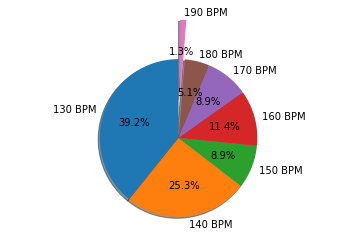

In [397]:
labels = '130 BPM', '140 BPM', '150 BPM', '160 BPM', '170 BPM', '180 BPM', '190 BPM'
sizes = [31, 20, 7, 9, 7, 4, 1]
explode = (0, 0, 0, 0, 0, 0, 0.5)      
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
print("Beats Per Minute in Top 100 Music (Spotify 2017)")
plt.show()

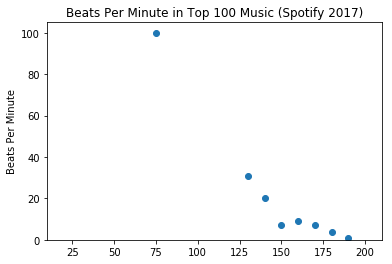

In [302]:
x = [75, 130, 140, 150, 160, 170, 180, 190]
y = [100, 31, 20, 7, 9, 7, 4, 1]
plt.ylabel('Beats Per Minute')
plt.xlim(10, 210)
plt.ylim(0,105)
plt.title('Beats Per Minute in Top 100 Music (Spotify 2017)')
plt.scatter(x,y)

plt.show()


# 3) What Are the BPM's in the Biggest Hits (Top 10% of Spotify's 2017 Chart) ? 

Text(0.5,0,'Top 10 Songs in 2017')

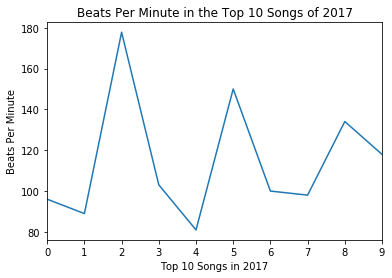

In [328]:
spt[0 : 10]['tempo'].plot()
plt.title('Beats Per Minute in the Top 10 Songs of 2017')
plt.xlim(0,9)
plt.ylabel('Beats Per Minute')
plt.xlabel('Top 10 Songs in 2017')

In [382]:
spt[0:10]['tempo'].describe()

count     10.000000
mean     114.669600
std       30.563781
min       80.924000
25%       96.479000
50%      101.493500
75%      130.042750
max      177.833000
Name: tempo, dtype: float64

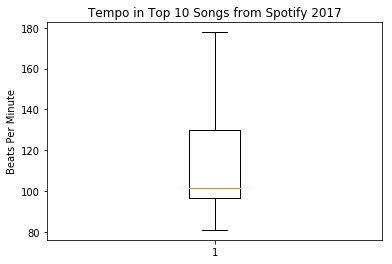

In [396]:
x = spt[0:10]['tempo']
plt.title('Tempo in Top 10 Songs from Spotify 2017')
plt.ylabel('Beats Per Minute')
plt.boxplot(x)
plt.show()

### In the Top 10 of Spotify's Chart from 2017, the average tempo was 114 Beats Per Minute, 41 Beats above the average resting heart rate.

# Further Research 

It'd be fascinating to take a look at musical genres and the numerical conventions that define them, for example, what are the Beats Per Minute in each genre, and why is this so? 

I would love to link this somehow as well to the psychology of songwriters and producers, and analyze why a certain personality type would end up producing in whatever genre they're most drawn to. I'd also like to link traits of creative types to the music they producer (Did Johnny Cash write his music in moments when he had a lower than average BPM? What are the reasons for the "mournful" qualities of his music?) How can we connect moods to chords? Do people with certain genetic predispositions fall into a certain range of chords? Who is the kind of person that goes toward Major Chords? Minor Chords? 7th Chords? 

I suppose to go about this I'd choose the specialization of Social Science. I would need to learn how to reduce words down to their most specific, logical forms so I could define them well enough in order to compose a numerical analysis of them. For example, how do I measure "mournfulness"? 